#SDS 2021 Spring - Deep Learning Models 실습

##Contents
- Text Mining
- Recommender System

## Text Mining

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Pandas basic tutorial

Pandas Dataframe - 2차원 구조의 Data를 쉽게 저장/확인/수정하기 위한 방법으로 사용하는 data format.

### Dataframe 생성

In [127]:
# pandas DataFrame 생성 기본 명령
# pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

import pandas as pd

df = pd.DataFrame([[1,2,3,4],[5,6,7,8]])
df

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


In [128]:
# Dictionary 형태의 data로 생성.
dict_data = {'col0': [1,2,3,4],
             'col1': [5,6,7,8],
             'col2': [9,10,11,12],}
row = ['row0','row1','row2', 'row3']

data = pd.DataFrame(data=dict_data, index=row)
data

,col0,col1,col2
row0,1,5,9
row1,2,6,10
row2,3,7,11
row3,4,8,12


In [129]:
# Array 형태의 data로 생성.
array_data = [[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]]
row = ['row0','row1','row2']
column = ['col0', 'col1', 'col2', 'col3']

data = pd.DataFrame(data=array_data, index=row, columns=column)
data

,col0,col1,col2,col3
row0,1,2,3,4
row1,5,6,7,8
row2,9,10,11,12


### Dataframe 내의 data 접근/수정

In [130]:
# column으로 바로 접근
data['col0']

row0    1
row1    5
row2    9
Name: col0, dtype: int64

In [131]:
# 특정 열에 접근
data.loc['row0',:]

col0    1
col1    2
col2    3
col3    4
Name: row0, dtype: int64

In [132]:
# 특정 행에 접근
data.loc[:,'col0']

row0    1
row1    5
row2    9
Name: col0, dtype: int64

In [133]:
# 특정 data에 접근
data.loc['row0','col0']

1

In [134]:
# 조건문을 통한 접근
data.loc[data['col1'].isin([1,2,3,4,5,6])]  # data['col1'] = [2, 6, 10]

,col0,col1,col2,col3
row0,1,2,3,4
row1,5,6,7,8


In [135]:
# 특정 data 수정
data.loc['row0','col0'] = 0
data

,col0,col1,col2,col3
row0,0,2,3,4
row1,5,6,7,8
row2,9,10,11,12


# Dataset: 5개 분야 뉴스 데이터셋 (정치, 경제, 기술&IT, 연예, 스포츠)

In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/file/d/1Tj3sWWGYEkD7gvv7ALudQ4UQ0DjavlT0/view?usp=sharing
gdd.download_file_from_google_drive(
    file_id='1Tj3sWWGYEkD7gvv7ALudQ4UQ0DjavlT0',
    dest_path='./NewsData1.csv',
)

In [177]:
dataset = pd.read_csv('./NewsData1.csv')

print('# of News data:',len(dataset))
dataset.head()

# of News data: 1000


,분류,본문
0,경제,[뒤끝뉴스] 한달 새 두 번이나 LG 연구단지에 간 대통령\t국민이 선출한 일국의 ...
1,경제,"""주유소 가기 무섭다""…휘발유 가격 근 3년만에 최고치\t한주만에 ℓ당 12.9원 ..."
2,경제,‘산타페’에 도전장 에퀴녹스 6월 출시…가격은\t한국지엠주식회사가 전략 신차 '이쿼...
3,경제,"코인' 관리 들어선 中, 사기성 암호화폐 421개 적발\t中 IFCERT, 사기 암..."
4,경제,"""노동시간 단축 최저임금보다 경제파급력 크다""\t""노동시간 단축 최저임금보다 경제파..."


## Text Preprocessing

In [118]:
dataset['본문'][0]  # 하나의 문장을 tokenize, 조사 제거 등 전처리 작업 필요.

'[뒤끝뉴스] 한달 새 두 번이나 LG 연구단지에 간 대통령\t국민이 선출한 일국의 대통령이란 자리는 시쳇말로 어마무시합니다. 행정의 수반이자 외교적으로는 국가를 대표하는 얼굴이고 대부분 군 통수권까지 갖고 있습니다.\n\n막강한 권한만큼 국민적 관심도 집중됩니다. 사소한 말 한마디와 행동은 물론 옷차림과 먹는 음식, 심지어 순식간에 스쳐 가는 표정에도 의미가 담깁니다. 설사 그런 의도가 전혀 없더라도 누군가는 거기서 ‘맥락’을 뽑아내기 위해 열심이죠.\n\n문재인 대통령도 마찬가지입니다. 대통령을 보좌하는 청와대의 수많은 수석과 비서관 등이 국정철학을 극대화하고 효과적인 메시지를 전달하기 위해 골몰합니다. 한반도의 운명을 가를 중요한 회담들이 눈앞인 데다 댓글 조작을 일으킨 드루킹 특검법과 추가경정예산안을 두고 여야가 격돌하는 요즘 같을 때는 더욱 그럴 겁니다.\n\n이런 분위기에서는 조그만 논란도 사전에 차단하기 위해 대통령의 동선 또한 더욱 치밀해질 텐데 채 한 달도 안 돼 문 대통령이 두 번이나 발길을 한 곳이 있습니다. LG가 서울 강서구 마곡동에 조성한 융복합 연구개발(R&D) 단지 LG사이언스파크입니다.\n\n첫 방문은 지난달 20일입니다. 2014년 첫 삽을 뜬 LG사이언스파크는 3년 6개월 만에 완성됐고 이날 개장식이 열렸습니다. 구본준 LG 부회장과 허창수 GS 회장 등이 문 대통령을 맞이했습니다. 문 대통령은 LG디스플레이가 개발한 두루마리형 디스플레이, LG전자의 인공지능 로봇과 미래형 계기판이 적용된 자동차 모형 등을 직접 체험했습니다. LG로서는 엄청난 홍보 효과를 얻었습니다.\n\n대기업과는 썩 친하지 않은(?) 문 대통령도 일찌감치 지주회사 체재를 완성한 LG는 좀 달랐던 것 같습니다. 문 대통령은 축사 중 “대기업과 중소기업이 상생협력하고 창업이 활발히 이뤄질 수 있도록 동반성장의 모범이 돼달라”고 언급하기도 했습니다.\n\n\nLG사이언스파크 두 번째 방문은 지난 17일입니다. 날짜로 따지면 27일 만인데, 그새 상황은 많이 달

### konlpy (한국어 전처리 패키지)

In [119]:
pip install konlpy

In [120]:
from konlpy.tag import Okt

Okt = Okt()  # Okt (Open Korean Text)

example = '멧돌 손잡이를 어이라 그래요 어이.'

# 명사 추출
print(Okt.nouns(example))

# 형태소 추출
print(Okt.morphs(example))

# 품사 부착
print(Okt.pos(example))

['멧돌', '손잡이', '어이', '어이']
['멧돌', '손잡이', '를', '어이', '라', '그래요', '어이', '.']
[('멧돌', 'Noun'), ('손잡이', 'Noun'), ('를', 'Josa'), ('어이', 'Noun'), ('라', 'Josa'), ('그래요', 'Adjective'), ('어이', 'Noun'), ('.', 'Punctuation')]


가장 작은 단위인 형태소로 분해하고 불용어를 제거하는 형태로 전처리를 진행.

### Dataset preprocessing

In [178]:
document = dataset['본문'][0]
document

'[뒤끝뉴스] 한달 새 두 번이나 LG 연구단지에 간 대통령\t국민이 선출한 일국의 대통령이란 자리는 시쳇말로 어마무시합니다. 행정의 수반이자 외교적으로는 국가를 대표하는 얼굴이고 대부분 군 통수권까지 갖고 있습니다.\n\n막강한 권한만큼 국민적 관심도 집중됩니다. 사소한 말 한마디와 행동은 물론 옷차림과 먹는 음식, 심지어 순식간에 스쳐 가는 표정에도 의미가 담깁니다. 설사 그런 의도가 전혀 없더라도 누군가는 거기서 ‘맥락’을 뽑아내기 위해 열심이죠.\n\n문재인 대통령도 마찬가지입니다. 대통령을 보좌하는 청와대의 수많은 수석과 비서관 등이 국정철학을 극대화하고 효과적인 메시지를 전달하기 위해 골몰합니다. 한반도의 운명을 가를 중요한 회담들이 눈앞인 데다 댓글 조작을 일으킨 드루킹 특검법과 추가경정예산안을 두고 여야가 격돌하는 요즘 같을 때는 더욱 그럴 겁니다.\n\n이런 분위기에서는 조그만 논란도 사전에 차단하기 위해 대통령의 동선 또한 더욱 치밀해질 텐데 채 한 달도 안 돼 문 대통령이 두 번이나 발길을 한 곳이 있습니다. LG가 서울 강서구 마곡동에 조성한 융복합 연구개발(R&D) 단지 LG사이언스파크입니다.\n\n첫 방문은 지난달 20일입니다. 2014년 첫 삽을 뜬 LG사이언스파크는 3년 6개월 만에 완성됐고 이날 개장식이 열렸습니다. 구본준 LG 부회장과 허창수 GS 회장 등이 문 대통령을 맞이했습니다. 문 대통령은 LG디스플레이가 개발한 두루마리형 디스플레이, LG전자의 인공지능 로봇과 미래형 계기판이 적용된 자동차 모형 등을 직접 체험했습니다. LG로서는 엄청난 홍보 효과를 얻었습니다.\n\n대기업과는 썩 친하지 않은(?) 문 대통령도 일찌감치 지주회사 체재를 완성한 LG는 좀 달랐던 것 같습니다. 문 대통령은 축사 중 “대기업과 중소기업이 상생협력하고 창업이 활발히 이뤄질 수 있도록 동반성장의 모범이 돼달라”고 언급하기도 했습니다.\n\n\nLG사이언스파크 두 번째 방문은 지난 17일입니다. 날짜로 따지면 27일 만인데, 그새 상황은 많이 달

In [179]:
import re

#불용어 정의
stopwords = ['의','가','이','은','로','및','들','는','좀','잘','걍','과','도','을','를','에게','으로','자','에','와','어','하','한','하다','한다','라는','된','에서','하고','할','될','이다','있다','이었다','했다','하는','있는','죠','입니다','됐다','까지']

tokenized_data = []
for index in range(len(dataset['본문'])):
    element = dataset.loc[index,'본문']

    # 특수문자 제거
    element = re.sub(r"[^ 가-힣a-zA-Z0-9]", ' ', element)

    # 형태소 추출
    element = Okt.morphs(element)

    # 불용어 제거
    element = [word for word in element if not word in stopwords]   # 불용어 제거

    # preprocessing을 거친 data로 수정
    tokenized_data.append(element)
    element = ' '.join(elem for elem in element)
    dataset.loc[index,'본문'] = element

In [180]:
dataset['본문'][500]  # 변환된 text

'차가운 얼음 위 열정 꽃 피운 이준형 KUSF 박성원 기자 지난 평창동계올림픽 피겨스케이팅 국가대표 선 발전 치열한 경쟁 펼쳐졌다 그중 단연 모두 기대 받으며 돋보이는 선수 있었다 16년 만에 올림픽 남자 싱글 종목 출전 권 따낸 이준형 1 차 선 발전 1 위 차지 이준형 작년 9월 네 벨 혼 트로피 대회 5 위 기록 하며 올림픽 출전 권 따냈다 이준형 잘해야 한다는 부담 감 컸지만 열심히 준비 하기도 했고 티켓 따냈을 때 뿌듯함이 좋은 기억 남아있다 라고 답 상승 기세 탄 이준형 힘 입어 2 차 선 발전 선두 유지 하지만 3 차 선 발전 실수 하며 아쉽게 평창올림픽 출전 권 놓쳤다 그러나 그 좌절 하지 않고 이후 펼쳐진 경기 멋진 연기 선보이며 관중 심금 울렸다 경기 마다 최선 다해 서 펼친 연기 그 열정 노력 보여주기에 충분했다 이준형 도전 여기 서 그치지 않았다 평창올림픽 피겨스케이팅 해설위원 새로운 도전 시도 해설위원 으로서 첫 발걸음 뗀 이준형 너무 많은 선수 보 니까 그 특징 다 못 알려 드린 것 같아서 아쉬운 부분 있어요 하지만 처음 피겨스케이팅 보시 분 쉽게 이해 수 있도록 노력 했습니다 라고 말 이준형 첫 해설 이라고 하기에 무색 만큼 차분한 해설 보여줬다 그 섬세한 해설 풍부한 전 문 지식 바탕 처음 접 사람 쉽게 이해 수 해설 라며 호평 받았다 열정 도전 가득했던 이준형 이야기 아직 끝나지 않았다 그 베이징 올림픽 때 꾸준히 노력 해서 10 위 안 들고 싶다 며 각오 밝혔다 성실한 자세 꾸준히 노력 이준형 앞 어떤 이야기 들려줄지 기대 해본다'

## BoW (Bag of Words)
document 1개에 대해서만 BoW 실행

In [144]:
document = ['멧돌 손잡이를 어이라 그래요 어이', '멧돌 손잡이 알아요?', '황당하잖아? 아무것도 아닌 손잡이 때문에 해야 할 일을 못하니까']

In [145]:
document = dataset['본문'][:1]

# sklearn 사용하여 BoW
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect = vect.fit(document)
bow = vect.transform(document).toarray()
word_column = vect.get_feature_names()

In [146]:
pd.DataFrame(data=bow, columns=word_column)

,100억원,12일,17일,18,18일,1년,2014년,2018년,20일,22일,27일,35,3년,9일,gs,lg,가는,가를,가져,감지,감치,강서구,강조,갖고,같습니다,같은,같을,개발,개월,개장,거기,거쳐,검찰,겁니다,게다가,격돌,경기,경제,경제정책,계기,...,탈루,테크노,텐데,트윈타워,특검법,파크,판교,판문점,판이,평가,평화,표정,하기,하기도,하나,하지,한다면,한마디,한미정상회담,한반도,합니다,해서인,해석,해야,했다고,했습니다,행동,행정,허창수,혁신,현지,혐의,협력,홍보,확정,활발히,회담,회장,효과,후보
0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,15,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,2,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,1,1,1,3,1,1,1,1,1,1,1,4,1,1,1,2,7,1,1,1,5,1,1,1,1,2,1,1,1,2,1


## DTM (Document-Term Matrix)
각 document들의 BoW를 하나의 행렬로 나타낸 것

In [147]:
document = dataset['본문'][:5]

vect = CountVectorizer()
vect = vect.fit(document)
BoW = vect.transform(document).toarray()
word_column = vect.get_feature_names()

In [148]:
# DTM
pd.DataFrame(data=BoW, columns=word_column)

,0원,10,100,100억원,11,12,12일,13,136,14,143,148,17,17일,18,186,18일,19,19일,1년,1원,1천,2004년,200만,2014년,2015년,2016년,2018,2018년,20일,22일,2725,27일,2800만,29,2년,2원,2월,3000만원,30일,...,해서는,해서인,해석,해야,해외,했다고,했던,했습니다,행동,행위,행정,허창수,혁신,현대,현실,현재,현지,혐의,협력,형성,형태,홍보,화폐,확산,확정,환경부,환상,활발히,활용,회담,회복,회사,회장,효과,효율,후보,후속,훌쩍,휘발유,힘들어
0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,2,0,0,0,0,0,0,0,...,0,1,1,1,0,2,0,7,1,0,1,1,5,0,0,0,1,1,1,0,0,1,0,0,2,0,0,1,0,1,0,0,1,2,0,1,0,0,0,0
1,5,2,0,0,1,4,0,1,0,2,0,0,1,0,0,0,0,0,1,0,2,13,0,0,0,1,1,0,0,0,0,0,0,0,1,1,3,2,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0
2,0,0,1,0,1,2,0,2,1,2,1,1,0,0,0,1,0,2,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,2,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,2,1,0,0,0,1,0,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## TF-IDF (Term Frequency-Inverse Document Frequency)

BoW처럼 단어의 출현 빈도(Term Frequency)만 고려하는 것이 아닌, Inverse Document Frequency도 고려하여 각 단어의 중요 정도를 가중치로 주는 방법.

In [149]:
document = dataset['본문'][:5]

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer()
Tfidf_vect = Tfidf_vect.fit(document)
Tfidf = Tfidf_vect.transform(document).toarray()
word_column = Tfidf_vect.get_feature_names()

In [150]:
# DTM (TfIdf applied)
pd.DataFrame(data=Tfidf, columns=word_column)

,0원,10,100,100억원,11,12,12일,13,136,14,143,148,17,17일,18,186,18일,19,19일,1년,1원,1천,2004년,200만,2014년,2015년,2016년,2018,2018년,20일,22일,2725,27일,2800만,29,2년,2원,2월,3000만원,30일,...,해서는,해서인,해석,해야,해외,했다고,했던,했습니다,행동,행위,행정,허창수,혁신,현대,현실,현재,현지,혐의,협력,형성,형태,홍보,화폐,확산,확정,환경부,환상,활발히,활용,회담,회복,회사,회장,효과,효율,후보,후속,훌쩍,휘발유,힘들어
0,0.000000,0.000000,0.000000,0.03018,0.000000,0.000000,0.03018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03018,0.03018,0.000000,0.024349,0.000000,0.000000,0.024349,0.000000,0.000000,0.000000,0.000000,0.03018,0.000000,0.000000,0.000000,0.03018,0.03018,0.03018,0.000000,0.060361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.03018,0.03018,0.020212,0.000000,0.048699,0.000000,0.170445,0.03018,0.000000,0.03018,0.03018,0.150902,0.000000,0.000000,0.000000,0.024349,0.03018,0.03018,0.000000,0.000000,0.03018,0.000000,0.000000,0.060361,0.000000,0.000000,0.03018,0.000000,0.03018,0.000000,0.000000,0.03018,0.060361,0.000000,0.03018,0.000000,0.000000,0.000000,0.000000
1,0.157186,0.062874,0.000000,0.00000,0.025363,0.101453,0.00000,0.025363,0.000000,0.050727,0.000000,0.000000,0.031437,0.00000,0.00000,0.000000,0.000000,0.000000,0.031437,0.000000,0.062874,0.408684,0.000000,0.000000,0.00000,0.031437,0.031437,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.031437,0.031437,0.094312,0.062874,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.031437,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.031437,0.251498,0.000000
2,0.000000,0.000000,0.038008,0.00000,0.030665,0.061330,0.00000,0.061330,0.038008,0.061330,0.038008,0.038008,0.000000,0.00000,0.00000,0.038008,0.000000,0.076017,0.000000,0.000000,0.000000,0.000000,0.038008,0.038008,0.00000,0.000000,0.000000,0.038008,0.00000,0.00000,0.00000,0.038008,0.000000,0.038008,0.000000,0.000000,0.000000,0.000000,0.076017,0.038008,...,0.038008,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.038008,0.000000,0.030665,0.000000,0.00000,0.00000,0.038008,0.000000,0.00000,0.000000,0.000000,0.000000,0.038008,0.000000,0.00000,0.000000,0.00000,0.038008,0.038008,0.00000,0.000000,0.038008,0.00000,0.038008,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.025789,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.021407,0.031964,0.000000,0.000000,0.000000,0.00000,0.063928,0.00000,0.00000,0.000000,0.000000,0.000000,0.051577,0.025789,0.00000,0.00000,0.000000,0.031964,0.00000,0.095893,0.025789,0.000000,0.000000,0.031964,0.00000,0.031964,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031964
4,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.044037,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.00000,0.036554,0.000000,0.044037,0.000000,0.044037,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.054582,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.044037,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


## Word2Vec

In [234]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=5, workers=4, sg=0)  # size: word vector size, window: window size, min_count: sg=0: CBOW / sg=1: Skip-gram

In [240]:
word_vector = model.wv

# see word embedding example. size: 50
word_vector['올림픽']

array([-0.22412646,  0.13942064, -0.07545656,  0.10987599, -0.7296992 ,
        0.5631879 , -0.17340182,  0.18359564,  0.16054168, -0.31445432,
       -0.2627065 , -0.13863829, -0.4307068 , -0.5455571 , -0.50914204,
       -0.6470252 , -0.39069915,  0.44255322,  0.56413794, -0.24064457,
       -0.21553282, -0.9418675 ,  0.09036627, -0.7677754 ,  0.23191145,
       -0.0809699 ,  0.46690667, -0.07474804, -0.3771371 , -0.3558347 ,
        0.49723104, -0.11239413, -0.28096724, -0.15696749,  0.277205  ,
       -0.35572562, -0.37456754, -0.19898613, -0.01316542,  0.5530822 ,
       -0.8244223 ,  0.46136662,  0.30343932, -0.03839888, -0.15665527,
       -0.3381867 , -0.32631883,  0.27676082, -0.12222485,  0.57869834,
        0.38609618, -0.30284575,  0.43160838, -0.29774296,  0.331372  ,
        0.37965685, -0.2832536 , -0.03516533,  0.24843091, -0.00425595,
       -0.13443045,  0.370378  ,  0.3069903 , -0.06972399,  0.08645546,
        0.01904822,  0.1893727 , -0.36340842,  0.01972494,  0.63

In [236]:
from sklearn.manifold import TSNE
vocab = list(word_vector.vocab)
embedding = model[vocab]

tsne = TSNE(n_components=2)

word_tsne = tsne.fit_transform(embedding)

word_df = pd.DataFrame(word_tsne, index=vocab, columns=['x','y'])
word_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


,x,y
뉴스,89.416161,-9.646446
달,84.266281,-16.623035
새,82.321991,-7.057928
두,81.730774,-14.822904
번,90.109367,-20.691660


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


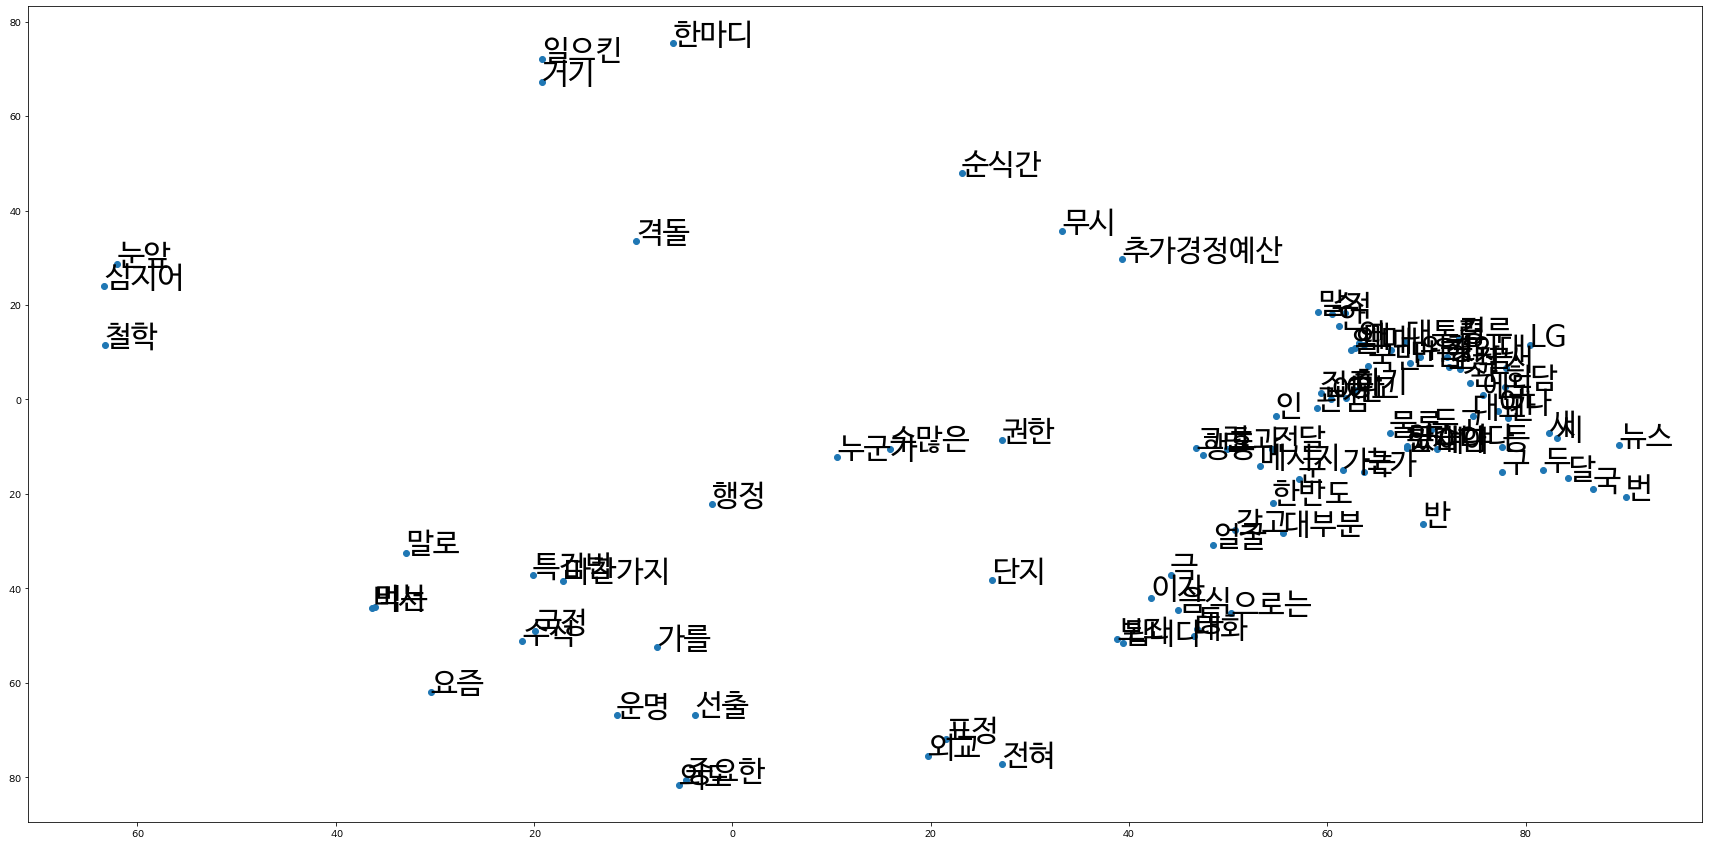

In [237]:
# word2vec visualize with TSNE
plt.rc('font', family='NanumBarunGothic')
fig, ax = plt.subplots(1, 1, figsize=(30, 15))
word_df = word_df.head(100)
ax.scatter(word_df['x'], word_df['y'])

for word, pos in word_df.iterrows():
    ax.annotate(word, pos, fontsize=30) 
plt.show()

In [239]:
# 유사한 단어 10개 뽑아보기.
word_vector.most_similar(positive=['올림픽'], topn=10)

[('경기장', 0.9996280670166016),
 ('평창', 0.9993088841438293),
 ('센터', 0.99927818775177),
 ('찬', 0.9992092251777649),
 ('전날', 0.999189019203186),
 ('글로벌', 0.9991674423217773),
 ('골목', 0.9991428852081299),
 ('회', 0.9991378784179688),
 ('체육', 0.9990975260734558),
 ('대명', 0.9990941286087036)]

# Topic Modeling

## LDA (Latent Dirichlet Allocation)

In [181]:
# 1000개의 data에 대해 진행
document = dataset['본문']

from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer()
Tfidf_vect = Tfidf_vect.fit(document)
Tfidf = Tfidf_vect.transform(document).toarray()
word_index = Tfidf_vect.get_feature_names()

In [214]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=5, random_state=0)
lda = lda.fit(Tfidf)

In [215]:
import numpy as np
lda.components_.sum(axis=1)[:, np.newaxis]

array([[ 6448.20780386],
       [ 5612.73317905],
       [12439.89992402],
       [ 6601.72632611],
       [ 5712.60407816]])

In [216]:
lda.components_.shape

(5, 27954)

In [217]:
topic_word_dist = lda.components_
doc_topic_dist = lda.transform(Tfidf)

# normalize
doc_topic_dist /= doc_topic_dist.sum(axis=1)[:, np.newaxis]
lda.components_ /= lda.components_.sum(axis=1)[:, np.newaxis]

In [218]:
# lda.componenets_ : 각 topic에 대한 word의 비중 분포
# lda.transform(Tfidf) : 각 document에 대한 topic의 비중 분포
topic_word_dist.shape, doc_topic_dist.shape

((5, 27954), (1000, 5))

#### Document에 대한 Topic distribution

In [219]:
# column names
topicnames = ['Topic_' + str(i) for i in range(1, len(topic_word_dist)+1)]

# index names
docnames = ['Doc_' + str(i) for i in range(1, len(doc_topic_dist)+1)]

# create a dataframe
df_document_topic = pd.DataFrame(data=doc_topic_dist, columns=topicnames, index=docnames)

# create dominant topic column
df_document_topic['Dominant_Topic'] = df_document_topic.idxmax(axis=1)
df_document_topic['Dominant_Topic_Score'] = df_document_topic.max(axis=1)

df_document_topic.head()

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Dominant_Topic_Score
Doc_1,0.012692,0.012454,0.949897,0.012504,0.012453,Topic_3,0.949897
Doc_2,0.375277,0.020465,0.562955,0.020838,0.020465,Topic_3,0.562955
Doc_3,0.020561,0.020511,0.917832,0.020583,0.020513,Topic_3,0.917832
Doc_4,0.019920,0.019848,0.845119,0.095265,0.019847,Topic_3,0.845119
Doc_5,0.018925,0.018893,0.924183,0.019108,0.018892,Topic_3,0.924183


#### Topic에 대한 word distribution

In [220]:
plt.rc('font', family='NanumBarunGothic')
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)     # 1 x 4의 subplots 생성

    topic_dist = model.components_
    for topic_idx, topic in enumerate(topic_dist):
        top_features_ind = topic.argsort()[::-1]                      # 값이 낮은 순으로 index를 정렬. [::-1]은 역순으로 바꾸어 줌.
        top_features_ind = top_features_ind[:n_top_words]             # 값이 가장 높은(비중이 높은) word를 n_top_words만큼 뽑기.
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)                    # horizontal bar
        ax.set_title('Topic '+str(topic_idx+1), fontdict={'fontsize': 30})
        ax.invert_yaxis()                                             # bar가 긴 것이 위로 오게 invert
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():                            # 아래 눈금을 제외한 subplot의 테두리 제거.
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

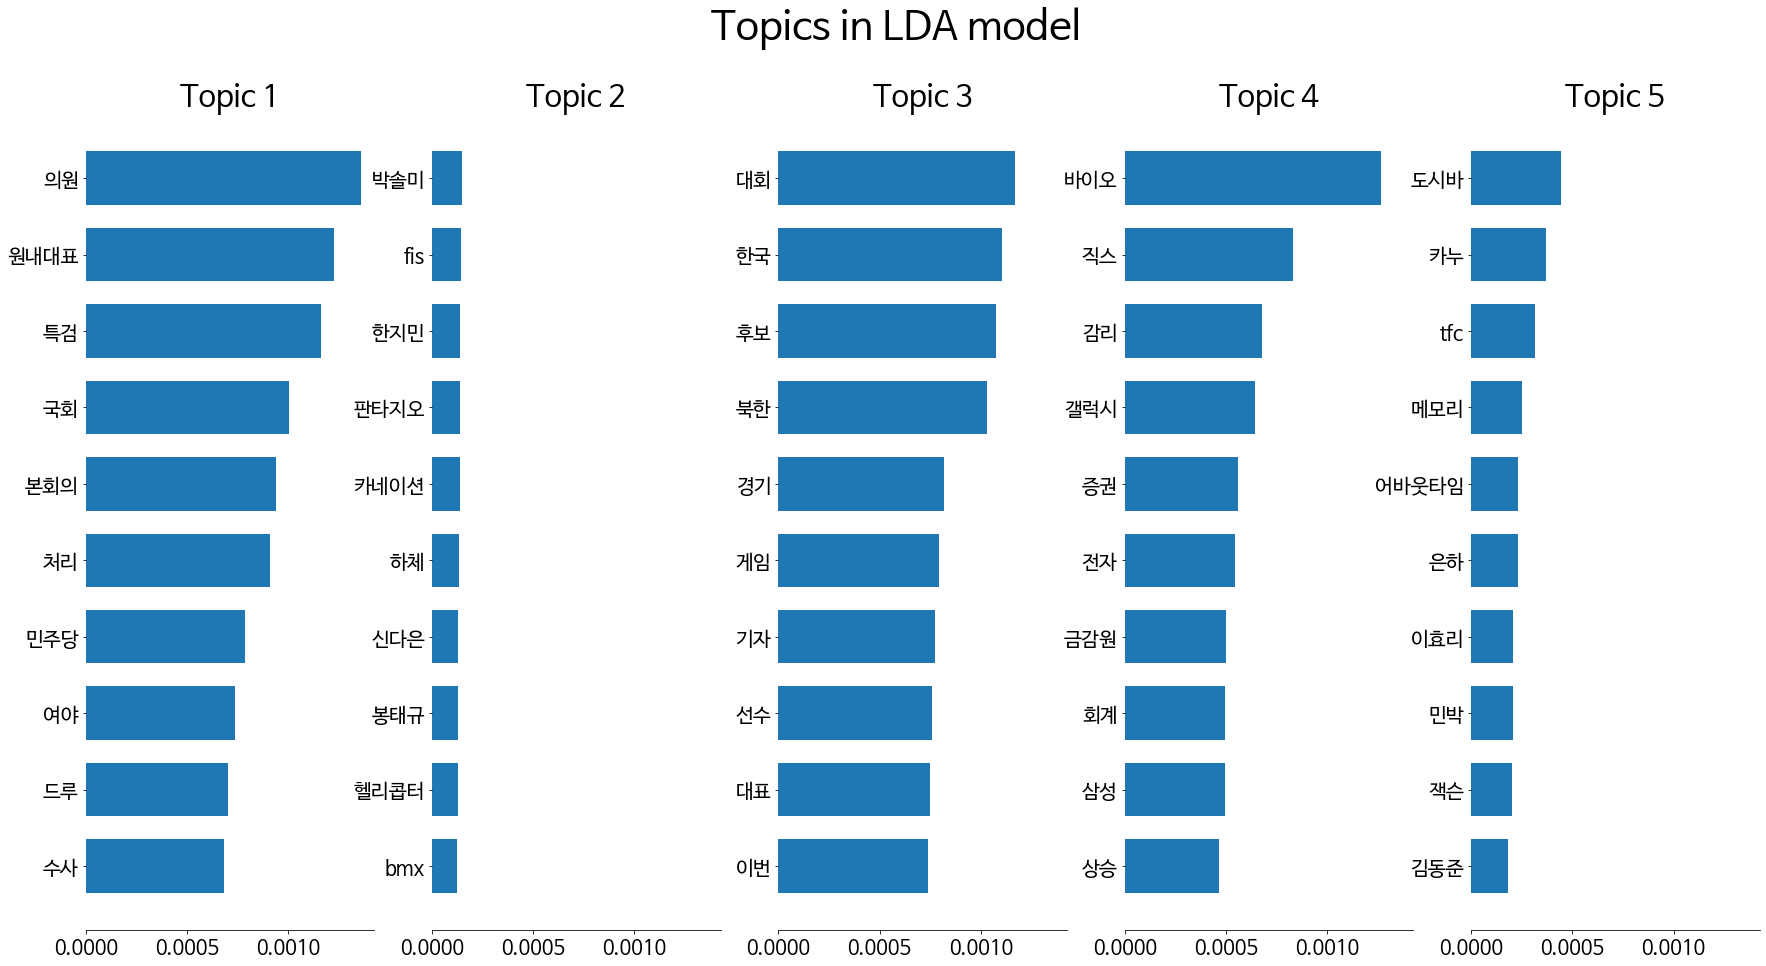

In [221]:
plot_top_words(lda, Tfidf_vect.get_feature_names(), 10, 'Topics in LDA model')

In [222]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import numpy as np
lda_vis = pyLDAvis.sklearn.prepare(lda, np.matrix(Tfidf), Tfidf_vect, mds='tsne')
pyLDAvis.display(lda_vis)

## Word Cloud

In [223]:
def plot_wordcloud(model, feature_names):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True, sharey=True)     # 1 x 4의 subplots 생성
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        topic_word_dict = {}
        for i, word in enumerate(feature_names):
            topic_word_dict[word] = topic[i]                                      # 특정 topic에 대한 word들의 비중(중요도)을 dictionary 형태로 저장.

        ax = axes[topic_idx]
        ax.set_title('Topic '+str(topic_idx+1), fontdict={'fontsize': 20})
        wordcloud.generate_from_frequencies(topic_word_dict)
        ax.imshow(wordcloud)
        ax.axis('off')

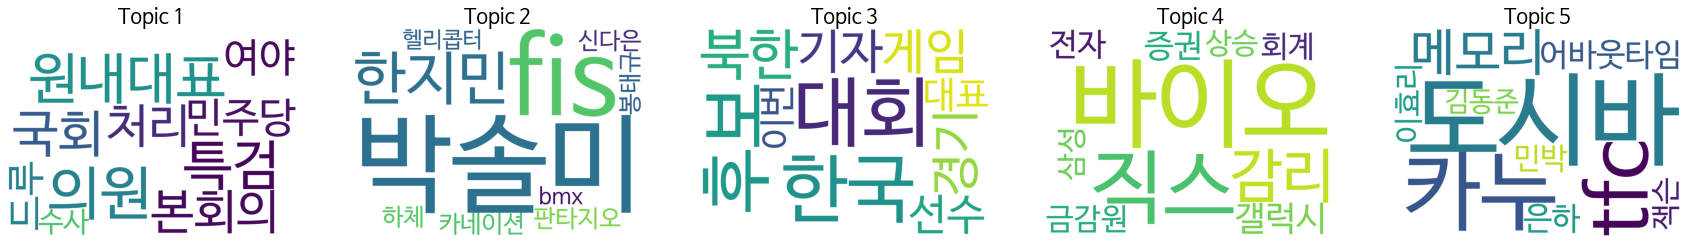

In [224]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path= 'NanumBarunGothic',
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10)

plot_wordcloud(lda, Tfidf_vect.get_feature_names())

# 1. Bert로 네이버 리뷰 데이터 감성 분석 해보기 (Classification)

In [245]:
# 코드 실행을 위해 필요한 library와 자료를 다운받습니다.
!pip install torchtext==0.6.0 -q
!pip install Transformers -q

# 필요한 라이브러리를 import 합니다.
from time import time
from tqdm.notebook import tqdm
import random
import os

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from torchtext import data
from torchtext import datasets

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

# GPU 학습이 가능한 경우, GPU를 사용하도록 설정해줍니다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 1.2MB 6.0MB/s 
     |████████████████████████████████| 1.8MB 5.7MB/s 
     |████████████████████████████████| 3.2MB 34.6MB/s 
     |████████████████████████████████| 890kB 40.2MB/s 


/usr/local/lib/python3.7/dist-packages/packaging/version.py:130: DeprecationWarning: Creating a LegacyVersion has been deprecated and will be removed in the next major release
  DeprecationWarning,


## 데이터셋

In [242]:
# 네이버 영화리뷰 감정분석 데이터 다운로드
!git clone https://github.com/e9t/nsmc.git

# 판다스로 훈련셋과 테스트셋 데이터 로드
train = pd.read_csv("nsmc/ratings_train.txt", sep='\t').dropna()
test = pd.read_csv("nsmc/ratings_test.txt", sep='\t').dropna()

print(train.shape)
print(test.shape)

train = train.sample(n=15000)
test = test.sample(n=5000)

print(train.shape)
print(test.shape)

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 19.24 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.
(149995, 3)
(49997, 3)
(15000, 3)
(5000, 3)


### Train set

In [243]:
# 리뷰 문장 추출
sentences = train['document'].tolist()

# 라벨 추출
labels = train['label'].tolist()

for i in range(5):
  print(labels[i], sentences[i])

1 부담없이 담백한 영화. 아이들에게도 편하게 다가갈수 있는 영화
0 뭐든지 1이 가장 좋다.
1 진짜 웃기다..김병욱pd꺼는 다웃김..순풍, 똑살등..
1 구석에 몰린 인생을 처절하게 간접체험 할 수 있다. 너무 슬프다. 그러나 통쾌하다.
0 보는내내 지루해서 죽는줄알았다.


In [246]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
tokenized_texts = tokenizer(sentences, padding = True, max_length=128)

# tensor로 변환
input_ids = torch.tensor(tokenized_texts['input_ids'])
attention_masks = torch.tensor(tokenized_texts['attention_mask'])
token_type_ids= torch.tensor(tokenized_texts['token_type_ids'])
labels = torch.tensor(labels)

print (sentences[0])
print (attention_masks[0])
print (token_type_ids[0])
print (labels[0] )


부담없이 담백한 영화. 아이들에게도 편하게 다가갈수 있는 영화
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])
tensor(1)


In [247]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, token_type_ids, labels)

train_size = int(0.8 * len(dataset))
val_size = len(dataset)-train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

12,000 training samples
3,000 validation samples


In [248]:
# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
valid_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

### Test set 

Train과 동일한 과정을 반복.
단 valid_set은 만들지 않음.

In [249]:
# 리뷰 문장 추출
sentences = test['document'].tolist()
# 라벨 추출
labels = test['label'].tolist()

# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
tokenized_texts = tokenizer(sentences, padding = True, max_length=128)

# tensor로 변환
input_ids = torch.tensor(tokenized_texts['input_ids'])
attention_masks = torch.tensor(tokenized_texts['attention_mask'])
token_type_ids= torch.tensor(tokenized_texts['token_type_ids'])
labels = torch.tensor(labels)

# Combine the training inputs into a TensorDataset.
test_dataset = TensorDataset(input_ids, attention_masks, token_type_ids, labels)

batch_size = 32
# For validation the order doesn't matter, so we'll just read them sequentially.
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

## 모델

In [250]:
# Configuration 클래스를 설정하여, 하이퍼파라미터를 관리합니다.
class BertConfig(object):
    def __init__(self, vocab_size, hidden_size=768, num_hidden_layers=6, num_heads=6, dropout_prob=0.1, max_position_embeddings=512, type_vocab_size=2):
        self.vocab_size = vocab_size
        self.hidden_size = hidden_size
        self.num_hidden_layers = num_hidden_layers
        self.num_heads = num_heads
        self.dropout_prob = dropout_prob
        # position embedding의 최대 개수, 즉 모델이 받아들이는 Sequence의 최대 길이입니다. 
        self.max_position_embeddings = max_position_embeddings
        # Next Sentence Prediction task를 위해 문장의 최대 개수를 설정합니다.
        self.type_vocab_size = 2

### 임베딩

In [251]:
# Embedding Layer 입니다.
class BertEmbeddings(nn.Module):
    def __init__(self, config):
        super(BertEmbeddings, self).__init__()
        self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=0)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
        self.token_type_embeddings = nn.Embedding(config.type_vocab_size, config.hidden_size)

        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout(config.dropout_prob)

    def forward(self, input_ids, token_type_ids=None):
        seq_length = input_ids.size(1)
        position_ids = torch.arange(seq_length, dtype=torch.long, device=input_ids.device)
        position_ids = position_ids.unsqueeze(0).expand_as(input_ids)

        # =================== 코드 작성 시작 ==================== (None 부분을 작성해주세요)
        # Input을 Embedding으로 변환합니다. 
        words_embeddings = None
        position_embeddings = None
        token_type_embeddings = None

        # 세 가지의 Embedding을 결합합니다.
        embeddings = None
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        # =================== 코드 작성 종료 ==================== (None 부분을 작성해주세요)
        return embeddings

### Transformer 인코더

In [252]:
# 전체 인코더입니다.
class BertEncoder(nn.Module):
    def __init__(self, config):
        super(BertEncoder, self).__init__()
        self.layers = nn.ModuleList([BertEncoder_Layer(config) for _ in range(config.num_hidden_layers)])

    def forward(self, hidden_states, attention_mask):
        # 반복해서 encoder layer를 통과시켜줍니다.
        for layer in self.layers:
            hidden_states = layer(hidden_states, attention_mask)

        return hidden_states

# 반복되는 Encoder Layer 입니다.
class BertEncoder_Layer(nn.Module):
    def __init__(self, config):
        super(BertEncoder_Layer, self).__init__()
        self.attention_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
        self.ffn_norm = nn.LayerNorm(config.hidden_size, eps=1e-12)
        self.ffn = nn.Linear(config.hidden_size, config.hidden_size)
        self.attn = BertAttention(config)

    def forward(self, x, attention_mask):
        # Attention
        h = x
        x = self.attn(x, attention_mask)
        # Residual Connection
        x = h + x
        # Layer Normalization
        x = self.attention_norm(x)

        # FFN
        h = x
        x = self.ffn(x)
        # Residual Connection
        x = x + h
        # Layer Normalization
        x = self.ffn_norm(x)

        return x

# Multi Head Attention Layer입니다. 
class BertAttention(nn.Module):
    def __init__(self, config):
        super(BertAttention, self).__init__()
        self.num_attention_heads = config.num_heads
        self.attention_head_size = int(config.hidden_size / config.num_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size

        self.query =nn.Linear(config.hidden_size, self.all_head_size)
        self.key = nn.Linear(config.hidden_size, self.all_head_size)
        self.value = nn.Linear(config.hidden_size, self.all_head_size)

        self.o_proj = nn.Linear(config.hidden_size, config.hidden_size)
        self.dropout = nn.Dropout(config.dropout_prob)

        self.softmax = nn.Softmax(dim=-1)

    def transpose_for_scores(self, x):
        new_x_shape = x.size()[:-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(*new_x_shape)
        return x.permute(0, 2, 1, 3)

    def forward(self, hidden_states, attention_mask):
        mixed_query_layer = self.query(hidden_states)
        mixed_key_layer = self.key(hidden_states)
        mixed_value_layer = self.value(hidden_states)

        query_layer = self.transpose_for_scores(mixed_query_layer)
        key_layer = self.transpose_for_scores(mixed_key_layer)
        value_layer = self.transpose_for_scores(mixed_value_layer)

        attention_scores = torch.matmul(query_layer, key_layer.transpose(-1, -2))
        attention_scores = attention_scores / np.sqrt(self.attention_head_size)
        attention_scores = attention_scores + attention_mask
        attention_probs = self.softmax(attention_scores)
        attention_probs = self.dropout(attention_probs)

        context_layer = torch.matmul(attention_probs, value_layer)
        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
        new_context_layer_shape = context_layer.size()[:-2] + (self.all_head_size,)
        context_layer = context_layer.view(*new_context_layer_shape)
        attention_output = self.o_proj(context_layer)

        return attention_output

### BERT 모델

In [253]:
class BERT(nn.Module):
    def __init__(self, config):
        super(BERT, self).__init__()
        self.config = config
        self.embeddings = BertEmbeddings(config)
        self.encoder = BertEncoder(config)
        self.pooler = nn.Linear(config.hidden_size, config.hidden_size)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None):
        # input_ids = [batch_size, seq_len]
        # token_type_ids = [batch_size, seq_len]
        # attention_mask = [batch_size, seq_len]

        # 따로 attention_mask를 입력하지 않는다면, 모든 단어에 대해 attention을 수행합니다.
        if attention_mask is None:
            attention_mask = torch.ones_like(input_ids)

        # attention_mask의 1부분을 0으로, 0 부분을 -10000으로 만듭니다.
        # softmax를 고려하여 구현된 부분입니다.
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)
        extended_attention_mask = extended_attention_mask.to(dtype=next(self.parameters()).dtype)
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        # =================== 코드 작성 시작 ==================== (None 부분을 작성해주세요)
        # input을 embedding으로 변환해주세요.
        embedding_output = None
        
        # 변환된 embedding을 transformer encoder를 통과시켜주세요.
        sequence_output = None
        
        # CLS token에 대한 output에 pooler를 적용시켜주세요.
        pooled_output = None
        # =================== 코드 작성 종료 ==================== (None 부분을 작성해주세요)

        return sequence_output, pooled_output

### 전체 모델 (BERT + Classification)

In [254]:
class classification_bert(nn.Module):
  def __init__(self, bertModel, num_labels):
    super(classification_bert, self).__init__()
    self.bert = bertModel
    self.dropout = nn.Dropout(0.1)
    # =================== 코드 작성 시작 ==================== (None 부분을 작성해주세요)
    # classifier를 만들어보세요.
    self.classifier = None
    # =================== 코드 작성 종료 ==================== (None 부분을 작성해주세요)

  def forward(self, input_ids, attention_mask, token_type_ids=None):
    # input_ids      = [batch_size, seq_len]
    # attention_mask = [batch_size, seq_len]

    # =================== 코드 작성 시작 ==================== (None 부분을 작성해주세요)
    # Bert 모델을 통과시켜 줍니다.
    # last_hidden_state = [batch_size, seq_len, hidden_size]                     : 마지막 layer의 output입니다.
    # pooler_output     = [batch_size, hidden_size]                              : CLS token의 output입니다.
    last_hidden_state, pooler_output = None
    
    # Dropout 적용
    pooler_output = self.dropout(pooler_output)

    # 얻은 pooler_output을 classifier를 이용해 예측값으로 변화시켜주세요.
    # Softmax는 적용하지 않아야합니다.
    # logits = [batch_size, num_labels]
    logits = None
    # =================== 코드 작성 종료 ==================== (None 부분을 작성해주세요)

    return logits

## 학습 및 평가

In [255]:
# 한 번의 Epoch을 학습합니다.
def train_one_epoch(model, iterator, optimizer, criterion):
    # train 모드로 변경합니다. dropout 등의 함수를 활성화합니다.
    model.train()

    epoch_loss = 0
    epoch_acc = 0
    for b, batch in tqdm(enumerate(iterator), total=len(iterator)):
        batch_input_ids = batch[0].to(device)
        batch_input_mask = batch[1].to(device)
        batch_input_type = batch[2].to(device)
        batch_labels = batch[3].to(device)

        # optimizer를 초기화 합니다.
        optimizer.zero_grad()

        # logits        = [batch_size, num_labels]
        logits = model(batch_input_ids, attention_mask=batch_input_mask, token_type_ids=batch_input_type)

        loss = criterion(logits, batch_labels)

        # 계산된 loss를 바탕으로 weight를 업데이트 합니다.
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

        preds = torch.argmax(logits, axis=1)
        acc = torch.mean((preds == batch_labels).float())

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        if b % 100 == 0 and b != 0:
          print("loss:", epoch_loss / b, "acc:", epoch_acc / b)

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

# 모델을 평가합니다.
def evaluate(model, iterator, criterion):
    # eval 모드로 변경합니다. dropout 등의 함수를 비활성화합니다.
    model.eval()

    total_loss = 0
    total_acc = 0

    # gradient를 계산하지 않아, 빠른 속도로 모델 실행이 가능합니다.
    with torch.no_grad():
        for _, batch in enumerate(iterator):
            batch_input_ids = batch[0].to(device)
            batch_input_mask = batch[1].to(device)
            batch_input_type = batch[2].to(device)
            batch_labels = batch[3].to(device)

            # logits        = [batch_size, num_labels]
            logits = model(batch_input_ids, attention_mask=batch_input_mask, token_type_ids=batch_input_type)

            loss = criterion(logits, batch_labels)


            preds = torch.argmax(logits, axis=1)
            acc = torch.mean((preds == batch_labels).float())
            
            total_loss += loss.item()
            total_acc += acc.item()

    return total_loss / len(iterator), total_acc / len(iterator)


# 모델의 파라미터 수를 세는 함수입니다.
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [256]:
HIDDEN_SIZE = 768
NUM_HIDDEN_LAYERS = 6
NUM_HEADS = 6

# 모델을 선언합니다.
config = BertConfig(tokenizer.vocab_size, hidden_size = HIDDEN_SIZE, num_hidden_layers = NUM_HIDDEN_LAYERS, num_heads = NUM_HEADS)
bertModel = BERT(config)
model = classification_bert(bertModel, 2)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
# Adam optimizer를 사용합니다.
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, eps=1e-8)
from transformers import get_linear_schedule_with_warmup

# 모델의 구조를 출력합니다.
print("모델 구조 : ", model)
print('모델 파라미터 수 :',  count_parameters(model))

모델 구조 :  classification_bert(
  (bert): BERT(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layers): ModuleList(
        (0): BertEncoder_Layer(
          (attention_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): Linear(in_features=768, out_features=768, bias=True)
          (attn): BertAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (o_proj): Linear(in_features=768, out_features=768, 

In [ ]:
N_EPOCHS = 5
CLIP = 1

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    start = time()

    train_loss, train_acc = train_one_epoch(model, train_dataloader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion)

    end_time = time()

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best_model.p')

    print(f'\nEpoch: {epoch+1:02} | Time: {end_time - start}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc.: {train_acc:.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc.: {valid_acc:.3f}')

model.load_state_dict(torch.load('best_model.p'))

test_loss, test_acc = evaluate(model, test_dataloader, criterion)
print(f'Test Loss: {test_loss:.3f} |  test. Acc.: {test_acc:.3f}')

In [ ]:
# random하게 3개의 리뷰에 대해 결과를 살펴봅니다.

model.eval()
for i in np.random.choice(len(test_dataset), 3):
  input_id, input_mask, input_token_id, label = test_dataset[i]
  with torch.no_grad():
    pred_logit = model(input_id.view(1, -1).to(device), input_mask.view(1, -1).to(device), input_token_id.view(1,-1).to(device))
  print("정답: ", label.numpy(), "\t리뷰: ", tokenizer.decode(input_id))
  print("예측: %.4f"%torch.softmax(pred_logit[0], dim=0).cpu().detach().numpy()[1])
  print("")

In [ ]:
# 직접 문장을 입력하여 예측치를 살펴보세요 :)
Input_sentence = '너무 재미있어요^^'

tokenized_sentence = tokenizer(Input_sentence)
input_id, input_mask, input_token_id = tokenized_sentence['input_ids'], tokenized_sentence['attention_mask'], tokenized_sentence['token_type_ids']

input_id = torch.tensor(input_id)
input_mask = torch.tensor(input_mask)
input_token_id = torch.tensor(input_token_id)

model.eval()
with torch.no_grad():
    pred_logit = model(input_id.view(1, -1).to(device), input_mask.view(1, -1).to(device), input_token_id.view(1,-1).to(device))
print("문장: ", Input_sentence)
print("예측: %.4f"%torch.softmax(pred_logit[0], dim=0).cpu().detach().numpy()[1])

#추천 시스템 (Recommender System)

### 필요한 데이터와 코드 다운로드

In [ ]:
# 데이터 파일과 전처리 코드
# 압축 파일을 다운로드 받고, 압축을 푼 후, 압축파일은 삭제하는 코드.

from google_drive_downloader import GoogleDriveDownloader as gdd
# https://drive.google.com/file/d/1LNZjlj7d532L7_fW2sExm0MgCLSm6xlv/view?usp=sharing
gdd.download_file_from_google_drive(
    file_id='1LNZjlj7d532L7_fW2sExm0MgCLSm6xlv',
    dest_path='./Recommender_System.zip',
)

!unzip Recommender_System.zip
!rm -rf Recommender_System.zip

print("데이터 다운로드 완료!")

Archive:  Recommender_System.zip
  inflating: utils/evaluation.py     
  inflating: utils/__pycache__/evaluation.cpython-36.pyc  
  inflating: utils/__pycache__/load_data.cpython-36.pyc  
  inflating: data/test_ml_100k.txt   
  inflating: data/u.item             
  inflating: utils/load_data.py      
  inflating: data/train_ml_100k.txt  
데이터 다운로드 완료!


Colab 환경 세팅

In [ ]:
import os
import copy
from os.path import join
import warnings

import torch
import torch.nn as nn
import numpy as np
import random

# colab에서 나오는 warning들을 무시합니다.
warnings.filterwarnings('ignore')

# 결과 재현을 위해 해당 코드에서 사용되는 라이브러리들의 Seed를 고정합니다.
def seed_everything(random_seed):
    torch.manual_seed(random_seed)
    torch.set_deterministic(True)
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)

seed = 1
seed_everything(seed)

### Memory-based Collaborative Filtering (CF) 

나와 비슷한 user를 찾은 후, 그 user가 봤던 item을 추천해줌

(비슷한 user가 여러 명이라면 그 유사도를 수치로 표현했을 때, 더 높은 유사도를 가진 user의 가중치를 높게 설정하도록.)</br>

Pseudo Code (한 사람 기준)
1. 나와 모든 user간 유사도를 item vector로 전부 계산</br>
for 내가 보지 않은 모든 item들에 대해 각각:</br>
2. 해당 item을 본 user들 중에 가장 유사도가 높은 user k명을 골라냄
3. k명의 user들의 유사도를 더해 predicted matrix에 기록.</br>
for loop end
4. 내가 보지 않은 item들 중 predicted matrix에서 가장 높은 점수를 기록한 item 순으로 추천.

In [ ]:
# collaborative filtering

# 필요 라이브러리 및 함수 불러오기
import numpy as np
from numpy import dot
from numpy.linalg import norm
from utils.load_data import data_loading
from utils.load_data import get_titles
from utils.evaluation import evaluation

# 데이터 불러오기
train_matrix, test_matrix, num_users, num_items = data_loading()

# 사용자-사용자 유사도 저장 행렬 만듦
user_sim_matrix = np.zeros((num_users, num_users))
for user_i in range(0, num_users):
    for user_j in range(user_i+1, num_users):
        a = train_matrix[user_i]
        b = train_matrix[user_j]
        # 코사인 유사도 이용
        user_sim_matrix[user_i, user_j] = dot(a, b)/(norm(a)*norm(b))
user_sim_matrix = (user_sim_matrix + user_sim_matrix.T)

# 예측 함수
def predict(u, i, topN):
    # item i를 시청한 사용자들
    rated_users = np.where(train_matrix[:, i] == 1)[0]

    # 사용자들의 유사도 가져오기
    unsorted_sim = user_sim_matrix[u, rated_users]

    # 유사도 정렬
    sorted_sim = np.sort(unsorted_sim)
    sorted_sim = sorted_sim[::-1]

    if(topN > len(sorted_sim)):
        topN = len(sorted_sim)

    # Top N 이웃의 유사도 가져오기
    sorted_sim = sorted_sim[0:topN]

    # 예측 값 구하기
    if(topN == 0):
        result = 0
    else:
        result = np.sum(sorted_sim) / topN

    return result

predicted_matrix = np.zeros((num_users, num_items))
for u in range(0, num_users):
    missing_items = np.where(train_matrix[u] == 0)[0]

    # 예측 함수를 이용하여 사용자가 시청하지 않은 항목의 값을 예측함
    for i in missing_items:
        # 150 명의 이웃을 이용하여 예측
        predicted_matrix[u, i] = predict(u, i, 2)

# 평가
hit50, hit100 = evaluation(predicted_matrix, train_matrix, test_matrix)
print("Hit@50:  ", hit50)
print("Hit@100: ", hit100)



# 시청 항목과 추천 항목 출력
print("-----------------------------------------------------")
u_id = 201
titles = get_titles()

print("사용자 시청 영화")
rated_items = np.where(train_matrix[u_id] == 1)[0]
rated_items = rated_items[0:20]
for i in rated_items:
    print(titles[i])

print("-----------------------------------------------------")

print("추천 영화 Top 20")
predicted_matrix[u_id, rated_items] = 0
topN_items = np.argsort(predicted_matrix[u_id])
topN_items = topN_items[::-1]
topN_items = topN_items[0:20]
for i in topN_items:
    print(titles[i])



 train_ml-100k
max user id 942
max item id 1681

 test_ml_100k
max user id 942
max item id 1670
Hit@50:   0.28844114528101805
Hit@100:  0.4528101802757158
-----------------------------------------------------
사용자 시청 영화
Toy Story (1995)
Terminator 2: Judgment Day (1991)
empire Strikes Back, The (1980)
Princess Bride, The (1987)
Amadeus (1984)
Terminator, The (1984)
Back to the Future (1985)
Kolya (1996)
Contact (1997)
Full Monty, The (1997)
emma (1996)
english Patient, The (1996)
Schindler's List (1993)
e.T. the extra-Terrestrial (1982)
Apartment, The (1960)
Maltese Falcon, The (1941)
Boot, Das (1981)
Local Hero (1983)
It Happened One Night (1934)
-----------------------------------------------------
추천 영화 Top 20
Indiana Jones and the Last Crusade (1989)
Monty Python and the Holy Grail (1974)
Rear Window (1954)
Raiders of the Lost Ark (1981)
Henry V (1989)
Aliens (1986)
Casablanca (1942)
Taxi Driver (1976)
Pink Floyd - The Wall (1982)
North by Northwest (1959)
Alien (1979)
Clockwork Or

In [ ]:
train_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
num_users

943

In [ ]:
num_items

1682

###Matrix Factorization (MF) Model-based Collaborative Filtering

목표 : User와 Item을 각각 latent vector로 표현하고자 함. (Word2Vec의 아이디어와 유사)</br>
user와 item을 k 차원의 vector로 표현하고자 함.</br> 
(user*item - target)^2 의 차이를 줄여 user와 item의 latent vector를 학습하는 방법.

그리고 이후 학습한 user와 item vector를 통해 예측한 값으로, user가 보지 않았던 item에 대한 값을 활용하여 추천에 활용하는 방법.

In [ ]:
import numpy as np
import torch
from utils.load_data import data_loading
from utils.load_data import get_titles
from utils.evaluation import evaluation

# 데이터 불러오기
train_matrix, test_matrix, num_users, num_items = data_loading()


 train_ml-100k
max user id 942
max item id 1681

 test_ml_100k
max user id 942
max item id 1670


In [ ]:
class MatrixFactorization(torch.nn.Module):
    def __init__(self, n_users, n_items, n_factors=20):
        super().__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors, sparse=False)
        self.item_factors = torch.nn.Embedding(n_items, n_factors, sparse=False)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self):
        return self.sigmoid(torch.matmul(self.user_factors.weight, self.item_factors.weight.T))

In [ ]:
# 하이퍼파라미터 설정
num_epochs = 550
learning_rate = 1e-2
num_factors = 64

# Pytorch를 이용해, MF 모델 만들기
model = MatrixFactorization(num_users, num_items, n_factors=num_factors).cuda()
loss_func = torch.nn.BCELoss() #MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  # learning rate

In [ ]:
ratings = torch.FloatTensor(train_matrix).cuda() # training matrix를 복사

# 사용자 시청 정보를 이용하여 U와 V를 업데이트 함.
for epoch in range(num_epochs):
    total_loss = 0
    optimizer.zero_grad()

    # 예측
    prediction = model.forward()
    loss = loss_func(prediction, ratings)

    # Backpropagate
    loss.backward()

    # Update the parameters
    optimizer.step()

In [ ]:
predicted_matrix = np.zeros((train_matrix.shape))
rows, cols = predicted_matrix.nonzero()

# MF를 이용하여 전체 항목의 값을 예측함.
with torch.no_grad():
    predicted_matrix = model.forward().cpu().numpy()

# 평가
hit50, hit100 = evaluation(predicted_matrix, train_matrix, test_matrix)
print("Hit@50:  ", hit50)
print("Hit@100: ", hit100)


# 시청 항목과 추천 항목 출력
print("-----------------------------------------------------")
u_id = 201
titles = get_titles()

print("사용자 시청 영화")
rated_items = np.where(train_matrix[u_id] == 1)[0]
rated_items = rated_items[0:20]
for i in rated_items:
    print(titles[i])

print("-----------------------------------------------------")

print("추천 영화 Top 20")
predicted_matrix[u_id, rated_items] = 0
topN_items = np.argsort(predicted_matrix[u_id])
topN_items = topN_items[::-1]
topN_items = topN_items[0:20]
for i in topN_items:
    print(titles[i])

Hit@50:   0.3149522799575822
Hit@100:  0.44644750795334043
-----------------------------------------------------
사용자 시청 영화
Toy Story (1995)
Terminator 2: Judgment Day (1991)
empire Strikes Back, The (1980)
Princess Bride, The (1987)
Amadeus (1984)
Terminator, The (1984)
Back to the Future (1985)
Kolya (1996)
Contact (1997)
Full Monty, The (1997)
emma (1996)
english Patient, The (1996)
Schindler's List (1993)
e.T. the extra-Terrestrial (1982)
Apartment, The (1960)
Maltese Falcon, The (1941)
Boot, Das (1981)
Local Hero (1983)
It Happened One Night (1934)
-----------------------------------------------------
추천 영화 Top 20
Nikita (La Femme Nikita) (1990)
Star Wars (1977)
Sense and Sensibility (1995)
Graduate, The (1967)
Singin' in the Rain (1952)
Gone with the Wind (1939)
Silence of the Lambs, The (1991)
North by Northwest (1959)
Return of the Jedi (1983)
Pulp Fiction (1994)
Jungle2Jungle (1997)
Fifth element, The (1997)
Citizen Kane (1941)
Die Hard (1988)
Fish Called Wanda, A (1988)
Around